In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Felipe
%cd /content/drive/MyDrive/Colab_Notebooks/min/bases

/content/drive/MyDrive/Colab_Notebooks/min/bases


In [ ]:
# Lucas
%cd /content/drive/MyDrive/Minería de datos/bases

/content/drive/MyDrive/Minería de datos/bases


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
import numpy as np
import seaborn as sns

# Supuestos:
- El plazo maximo de pausa en los estudios es 3 años, por lo que, si avanzado ese plazo no aparece: abandono
- area_carrera_generica agrupa todas las variaciones de una carrera (ya sea bachilleratos, especialidades)
- El dia de nacimiento sera el 1 dia del mes que aparezca y la edad se calculara como el tiempo pasado hasta el primer dia del año de medición
- Ignoraremos a quienes se hayan titulados (no hay demasiados)

Para lograr unir las bases en una sola, primero filtre cada una por separado segun area de interes areas_interes = ["Construcción Civil", "Terapia Ocupacional", "Ingeniería Civil, plan común y licenciatura en Ciencias de la Ingeniería", "Obstetricia y Puericultura", "Medicina", "Técnico en Mantenimiento Industrial", "Técnico en Mecánica Industrial", "Técnico en Construcción y Obras Civiles", "Técnico en Electricidad y Electricidad Industrial", "Ingeniería en Electrónica"], las guarde por año y las uní con un append.

In [ ]:
# Cargar base de datos de matriculados en enseñanza superior desde los años 2015 a 2019 del top 5 de carreras con mas desercion y top 5 menos desercion (SIES)
df = pd.read_csv("df_unida_final.csv", low_memory=False)

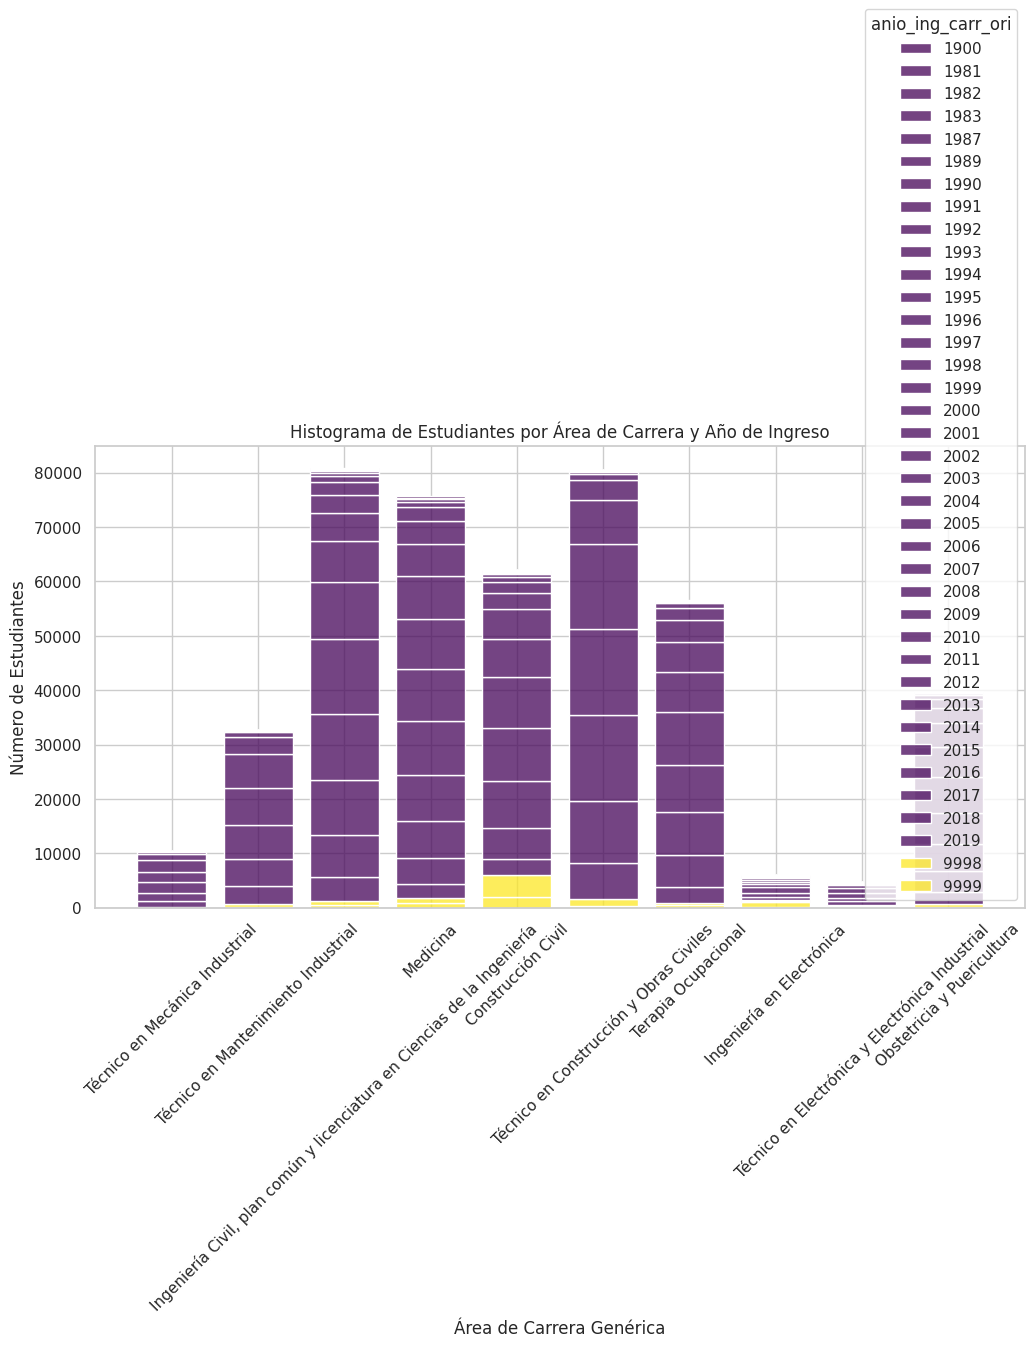

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama df_base_filtrada
# y que las columnas son 'area_carrera_generica' y 'anio_ing_carr_ori'

# Configuración de estilo de seaborn (opcional, pero puede hacer que los gráficos sean más atractivos)
sns.set(style="whitegrid")

# Crear el histograma
plt.figure(figsize=(12, 6))
histograma = sns.histplot(data=df, x='area_carrera_generica', hue='anio_ing_carr_ori', multiple="stack", palette="viridis", shrink=0.8)

# Ajustar etiquetas y título
plt.xlabel('Área de Carrera Genérica')
plt.ylabel('Número de Estudiantes')
plt.title('Histograma de Estudiantes por Área de Carrera y Año de Ingreso')

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



# Basandonos en que el maximo de años que alguien puede pausar sus estudios son 3 años, use esta clasificación
Para obtener los mrun (id) use el siguiente codigo: # Crear un DataFrame vacío para almacenar los resultados
columnas_estudiantes = ['cat_periodo', 'mrun', 'estado']
df_estudiantes = pd.DataFrame(columns=columnas_estudiantes)

# Lista de DataFrames con los datos
bases = [df_2015_filtered, df_2016_filtered, df_2017_filtered, df_2018_filtered, df_2019_filtered]

# Iterar sobre las bases de datos (hasta la penúltima)
for i in range(len(bases) - 1):
    base_actual = bases[i]

    # Iterar sobre las filas de la base actual
    for index, fila in base_actual.iterrows():
        mrun = fila['mrun']
        cat_periodo = fila['cat_periodo']

        # Verificar si el mrun aparece en la base siguiente
        mrun_en_siguiente = mrun in bases[i + 1]['mrun'].values

        if mrun_en_siguiente:
            # Guardar en el DataFrame con estado "Sigue estudiando"
            df_estudiantes = df_estudiantes.append({'cat_periodo': cat_periodo, 'mrun': mrun, 'estado': 'Sigue estudiando'},
                                                     ignore_index=True)
        else:
            # Buscar en las tres bases posteriores
            for j in range(1, 4):
                mrun_en_bases_posteriores = any(mrun in base['mrun'].values for base in bases[i + j:i + j + 1])

                if mrun_en_bases_posteriores:
                    # Guardar en el DataFrame con estado "Pausa en los estudios"
                    df_estudiantes = df_estudiantes.append({'cat_periodo': cat_periodo, 'mrun': mrun, 'estado': 'Pausa en los estudios'},
                                                             ignore_index=True)
                    break  # Salir del bucle si encontramos el mrun en las bases posteriores
            else:
                # Si el bucle for termina sin un break, significa que no se encontró en las bases posteriores
                # Guardar en el DataFrame con estado "Abandono de carrera"
                df_estudiantes = df_estudiantes.append({'cat_periodo': cat_periodo, 'mrun': mrun, 'estado': 'Abandono de carrera'},
                                                         ignore_index=True)

In [ ]:
df_desertores = pd.read_csv("df_est_clas.csv")

In [ ]:
df_desertores.head(20)

,cat_periodo,mrun,estado
0,2015,257.0,Abandono de carrera
1,2015,482.0,Abandono de carrera
2,2015,630.0,Abandono de carrera
3,2015,868.0,Sigue estudiando
4,2015,875.0,Sigue estudiando
5,2015,1177.0,Sigue estudiando
6,2015,1215.0,Sigue estudiando
7,2015,1360.0,Sigue estudiando
8,2015,1971.0,Abandono de carrera
9,2015,2258.0,Sigue estudiando


In [ ]:
df[df['mrun'] == 5447]

,cat_periodo,id,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,...,area_carrera_generica,cine_f_13_area,cine_f_13_subarea,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso
19,2015,825926,I123S3C44J2V1,5447.0,1,197303,40 y más años,2014,1.0,NaN,...,Técnico en Electricidad y Electricidad Industrial,"Ingeniería, Industria y Construcción",Ingeniería y Profesiones Afines,NO ACREDITADA,ACREDITADA,12/03/2015 - 12/03/2019,4.0,221500,10000,NaN
91525,2016,205074,I123S3C44J2V1,5447.0,1,197303,40 y más años,2014,1.0,NaN,...,Técnico en Electricidad y Electricidad Industrial,"Ingeniería, Industria y Construcción",Ingeniería y Profesiones Afines,NO ACREDITADA,ACREDITADA,12/03/2015 - 12/03/2019,4.0,230500,0,NaN


In [ ]:
# Agregar clasificación de continuidad

# Combinar los DataFrames en base a la columna 'mrun'
df_combinado = pd.merge(df, df_desertores[['mrun', 'estado']], on='mrun', how='left')
df_combinado.sample(5)

,cat_periodo,id,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,...,cine_f_13_area,cine_f_13_subarea,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso,estado
688344,2017,961197,I78S1C48J1V1,15571521.0,2,198902,25 a 29 años,9998,NaN,2007.0,...,Salud y Bienestar,Salud,ACREDITADA,ACREDITADA,26/11/2014 - 26/11/2019,5.0,0,171000,NaN,Sigue estudiando
1223454,2019,594112,I100S9C176J1V1,20405302.0,1,199909,15 a 19 años,2019,1.0,2019.0,...,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,NO ACREDITADA,ACREDITADA,11-12-2016 - 11-12-2022,6.0,NaN,NaN,1- Ingreso Directo (regular),NaN
922236,2018,959682,I100S29C176J1V1,12334351.0,1,199508,20 a 24 años,2016,1.0,2016.0,...,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,ACREDITADA,ACREDITADA,11-12-2016 - 11-12-2022,6.0,NaN,NaN,1- Ingreso Directo (regular),Sigue estudiando
1010129,2018,492721,I86S1C117J1V1,21040139.0,1,199604,20 a 24 años,2015,1.0,2015.0,...,Salud y Bienestar,Salud,ACREDITADA,ACREDITADA,30-11-2011 - 30-11-2018,7.0,NaN,NaN,1- Ingreso Directo (regular),Sigue estudiando
312376,2016,661073,I39S6C145J1V1,7149544.0,2,199707,15 a 19 años,2016,1.0,NaN,...,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,12/09/2012 - 12/09/2016,4.0,58077,58077,NaN,Sigue estudiando


1. - Supuesto: todos nacieron el primero de cada mes y los datos fueron medidos el primer dia de cat_periodo

In [ ]:
# Transformar fec_nac_alu a edad
# Supongamos que df_combinado es tu DataFrame combinado

# Convierte la columna 'fec_nac_alu' a formato datetime
df_combinado['fec_nac_alu'] = pd.to_datetime(df_combinado['fec_nac_alu'], format='%Y%m', errors='coerce')

# Calcula la edad restando el año de nacimiento del año de medición
df_combinado['edad'] = df_combinado['cat_periodo'].astype(int) - df_combinado['fec_nac_alu'].dt.year


In [ ]:
import pandas as pd
import numpy as np

# Supongamos que df_combinado es tu DataFrame combinado

# Reemplaza los valores específicos con NaN en 'anio_ing_carr_ori'
valores_a_reemplazar = [9995, 9998, 9999, 1900]
df_combinado['anio_ing_carr_ori'] = df_combinado['anio_ing_carr_ori'].replace(valores_a_reemplazar, np.nan)

# Calcula la cantidad de años que lleva estudiando
df_combinado['anios_estudiando'] = df_combinado['cat_periodo'].astype(int) - df_combinado['anio_ing_carr_ori']

# Muestra el DataFrame resultante
print(df_combinado[['anio_ing_carr_ori', 'cat_periodo', 'anios_estudiando']])


         anio_ing_carr_ori  cat_periodo  anios_estudiando
0                   2014.0         2015               1.0
1                   2013.0         2015               2.0
2                   2015.0         2015               0.0
3                   2015.0         2015               0.0
4                   2015.0         2015               0.0
...                    ...          ...               ...
1265463             2019.0         2019               0.0
1265464             2019.0         2019               0.0
1265465             2019.0         2019               0.0
1265466             2019.0         2019               0.0
1265467             2019.0         2019               0.0

[1265468 rows x 3 columns]


In [ ]:
# Lista de columnas deseadas
columnas_deseadas = ['cat_periodo', 'mrun', 'fec_nac_alu', 'anio_ing_carr_ori', 'tipo_inst_3',
                     'nomb_inst', 'nomb_carrera', 'jornada', 'dur_total_carr', 'region_sede',
                     'acreditada_carr', 'acreditada_inst', 'Continuidad_estudios', 'edad',
                     'anios_estudiando']

# Lista completa de columnas del DataFrame
columnas_completas = ['cat_periodo', 'id', 'codigo_unico', 'mrun', 'gen_alu', 'fec_nac_alu',
       'rango_edad', 'anio_ing_carr_ori', 'sem_ing_carr_ori',
       'anio_ing_carr_act', 'sem_ing_carr_act', 'tipo_inst_1', 'tipo_inst_2',
       'tipo_inst_3', 'cod_inst', 'nomb_inst', 'cod_sede', 'nomb_sede',
       'cod_carrera', 'nomb_carrera', 'modalidad', 'jornada', 'version',
       'tipo_plan_carr', 'dur_estudio_carr', 'dur_proceso_tit',
       'dur_total_carr', 'region_sede', 'provincia_sede', 'comuna_sede',
       'nivel_global', 'nivel_carrera_1', 'nivel_carrera_2',
       'requisito_ingreso', 'vigencia_carrera', 'formato_valores',
       'valor_matricula', 'valor_arancel', 'codigo_demre', 'area_conocimiento',
       'cine_f_97_area', 'cine_f_97_subarea', 'area_carrera_generica',
       'cine_f_13_area', 'cine_f_13_subarea', 'acreditada_carr',
       'acreditada_inst', 'acre_inst_desde_hasta', 'acre_inst_anio',
       'costo_proceso_titulacion', 'costo_obtencion_titulo_diploma',
       'forma_ingreso', 'Continuidad_estudios', 'edad', 'anios_estudiando']

# Identificar las columnas que no se repiten
columnas_no_repetidas = set(columnas_completas).difference(columnas_deseadas)

# Mostrar las columnas que no se repiten
print("Columnas que no se repiten:")
print(columnas_no_repetidas)


Columnas que no se repiten:
{'costo_proceso_titulacion', 'anio_ing_carr_act', 'sem_ing_carr_act', 'requisito_ingreso', 'cod_carrera', 'acre_inst_desde_hasta', 'acre_inst_anio', 'modalidad', 'rango_edad', 'area_carrera_generica', 'sem_ing_carr_ori', 'cine_f_97_area', 'tipo_inst_1', 'valor_arancel', 'costo_obtencion_titulo_diploma', 'version', 'vigencia_carrera', 'dur_estudio_carr', 'nivel_carrera_1', 'valor_matricula', 'forma_ingreso', 'cine_f_13_subarea', 'provincia_sede', 'cine_f_97_subarea', 'id', 'tipo_plan_carr', 'nivel_carrera_2', 'tipo_inst_2', 'area_conocimiento', 'comuna_sede', 'codigo_demre', 'gen_alu', 'nivel_global', 'cod_inst', 'cod_sede', 'formato_valores', 'cine_f_13_area', 'codigo_unico', 'dur_proceso_tit', 'nomb_sede'}


In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['valor_matricula', 'formato_valores', 'vigencia_carrera', 'gen_alu', 'valor_arancel', 'cod_inst', 'rango_edad',
                        'tipo_plan_carr', 'tipo_inst_1', 'cod_sede', 'sem_ing_carr_act', 'cine_f_97_area', 'dur_estudio_carr',
                        'requisito_ingreso', 'costo_proceso_titulacion', 'costo_obtencion_titulo_diploma', 'id', 'sem_ing_carr_ori',
                        'nivel_carrera_1', 'cod_carrera', 'forma_ingreso', 'codigo_unico', 'area_conocimiento',
                        'acre_inst_desde_hasta', 'nomb_sede', 'cine_f_13_subarea', 'modalidad', 'acre_inst_anio', 'version', 'comuna_sede',
                        'anio_ing_carr_act', 'codigo_demre', 'nivel_carrera_2', 'cine_f_97_subarea', 'provincia_sede', 'tipo_inst_2',
                        'cine_f_13_area', 'dur_proceso_tit', 'nivel_global']

# Eliminar las filas correspondientes a las columnas especificadas
df_combinado = df_combinado.drop(columnas_a_eliminar, axis=1)

# Muestra el DataFrame resultante
print(df_combinado)


         cat_periodo   mrun fec_nac_alu  anio_ing_carr_ori  \
0               2015  257.0  1967-05-01             2014.0   
1               2015  482.0  1990-04-01             2013.0   
2               2015  630.0  1986-10-01             2015.0   
3               2015  868.0  1995-04-01             2015.0   
4               2015  868.0  1995-04-01             2015.0   
...              ...    ...         ...                ...   
1265463         2019    NaN  1995-01-01             2019.0   
1265464         2019    NaN  1995-01-01             2019.0   
1265465         2019    NaN  1995-01-01             2019.0   
1265466         2019    NaN  1995-01-01             2019.0   
1265467         2019    NaN  1995-01-01             2019.0   

                           tipo_inst_3                         nomb_inst  \
0        Universidades Estatales CRUCH              UNIVERSIDAD DE TALCA   
1         Centros de Formación Técnica                        CFT INACAP   
2         Centros de Formac

In [ ]:
df_combinado.sample(10)

,cat_periodo,mrun,fec_nac_alu,anio_ing_carr_ori,tipo_inst_3,nomb_inst,nomb_carrera,jornada,dur_total_carr,region_sede,acreditada_carr,acreditada_inst,estado,edad,anios_estudiando
80516,2015,8613185.0,1997-04-01,2015.0,Institutos Profesionales,IP DE CHILE,TERAPIA OCUPACIONAL,Diurno,11,Coquimbo,ACREDITADA,ACREDITADA,Sigue estudiando,18,0.0
401618,2016,15219518.0,1995-12-01,NaN,Universidades Privadas,UNIVERSIDAD ADOLFO IBAÑEZ,"INGENIERIA CIVIL, PLAN COMUN",Diurno,5,Metropolitana,NO ACREDITADA,ACREDITADA,Sigue estudiando,21,NaN
1057483,2019,640317.0,1992-12-01,2017.0,Institutos Profesionales,IP DUOC UC,TECNICO EN ELECTRICIDAD Y AUTOMATIZACION INDUS...,Vespertino,5,Metropolitana,NO ACREDITADA,ACREDITADA,Sigue estudiando,27,2.0
208792,2015,22367817.0,1992-01-01,2011.0,Universidades Privadas,UNIVERSIDAD MAYOR,TERAPIA OCUPACIONAL,Diurno,10,Metropolitana,NO ACREDITADA,ACREDITADA,Abandono de carrera,23,4.0
1176262,2019,14707956.0,1989-04-01,2013.0,Centros de Formación Técnica,CFT INACAP,ELECTRICIDAD INDUSTRIAL MENCION INSTALACIONES ...,Vespertino,5,Los Lagos,ACREDITADA,ACREDITADA,Sigue estudiando,30,6.0
87985,2015,9411920.0,1992-04-01,2011.0,Universidades Privadas CRUCH,UNIVERSIDAD AUSTRAL DE CHILE,MEDICINA,Diurno,14,Los Ríos,ACREDITADA,ACREDITADA,Sigue estudiando,23,4.0
1191069,2019,16479379.0,1985-11-01,2013.0,Universidades Privadas CRUCH,UNIVERSIDAD CATOLICA DE LA SANTISIMA CONCEPCION,LICENCIATURA EN MEDICINA,Diurno,14,Biobío,ACREDITADA,ACREDITADA,Sigue estudiando,34,6.0
745297,2017,20591258.0,1993-09-01,2016.0,Institutos Profesionales,IP AIEP,TECNICO EN CONSTRUCCION,Vespertino,5,Metropolitana,ACREDITADA,ACREDITADA,Sigue estudiando,24,1.0
284334,2016,4609784.0,1994-02-01,2016.0,Institutos Profesionales,IP DUOC UC,TECNICO EN ELECTRICIDAD Y AUTOMATIZACION INDUS...,Vespertino,5,Valparaíso,NO ACREDITADA,ACREDITADA,Sigue estudiando,22,0.0
1248796,2019,23451458.0,1996-05-01,2016.0,Universidades Privadas,UNIVERSIDAD DEL DESARROLLO,MEDICINA,Diurno,14,Metropolitana,ACREDITADA,ACREDITADA,Sigue estudiando,23,3.0


# Creación de dummies

In [ ]:
df_combinado.columns

Index(['cat_periodo', 'id', 'codigo_unico', 'mrun', 'gen_alu', 'fec_nac_alu',
       'rango_edad', 'anio_ing_carr_ori', 'sem_ing_carr_ori',
       'anio_ing_carr_act', 'sem_ing_carr_act', 'tipo_inst_1', 'tipo_inst_2',
       'tipo_inst_3', 'cod_inst', 'nomb_inst', 'cod_sede', 'nomb_sede',
       'cod_carrera', 'nomb_carrera', 'modalidad', 'jornada', 'version',
       'tipo_plan_carr', 'dur_estudio_carr', 'dur_proceso_tit',
       'dur_total_carr', 'region_sede', 'provincia_sede', 'comuna_sede',
       'nivel_global', 'nivel_carrera_1', 'nivel_carrera_2',
       'requisito_ingreso', 'vigencia_carrera', 'formato_valores',
       'valor_matricula', 'valor_arancel', 'codigo_demre', 'area_conocimiento',
       'cine_f_97_area', 'cine_f_97_subarea', 'area_carrera_generica',
       'cine_f_13_area', 'cine_f_13_subarea', 'acreditada_carr',
       'acreditada_inst', 'acre_inst_desde_hasta', 'acre_inst_anio',
       'costo_proceso_titulacion', 'costo_obtencion_titulo_diploma',
       'forma_ingr

In [ ]:
import pandas as pd

# Supongamos que df_combinado es tu DataFrame combinado
# Para ver todas las categorías en cada columna, puedes usar:
for columna in df_combinado.columns:
    if df_combinado[columna].dtype == 'object':
        categorias = df_combinado[columna].value_counts()
        print(f"Categorías en la columna '{columna}':\n{categorias}\n")

Categorías en la columna 'tipo_inst_3':
Universidades Privadas                    342171
Institutos Profesionales                  311876
Universidades Privadas CRUCH              245547
Universidades Estatales CRUCH             221499
Centros de Formación Técnica              143455
Centros de Formación Técnica Estatales       467
Universidades (* Carrera en Convenio)        453
Name: tipo_inst_3, dtype: int64

Categorías en la columna 'nomb_inst':
PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE                                          97032
IP AIEP                                                                           95518
IP DUOC UC                                                                        77110
UNIVERSIDAD DE CHILE                                                              76501
CFT INACAP                                                                        75888
                                                                                  ...  
UNIVERSIDAD LA REP

In [ ]:
df_combinado['tipo_inst_3'].unique()

array(['Universidades Estatales CRUCH', 'Centros de Formación Técnica',
       'Universidades Privadas', 'Institutos Profesionales',
       'Universidades Privadas CRUCH',
       'Centros de Formación Técnica Estatales',
       'Universidades (* Carrera en Convenio)'], dtype=object)

In [ ]:
df_combinado['nomb_inst'].unique()

array(['UNIVERSIDAD DE TALCA', 'CFT INACAP', 'UNIVERSIDAD DE CHILE',
       'UNIVERSIDAD MAYOR', 'IP DE CHILE', 'UNIVERSIDAD DIEGO PORTALES',
       'CFT SANTO TOMAS', 'IP AIEP', 'UNIVERSIDAD DE LOS ANDES',
       'UNIVERSIDAD AUTONOMA DE CHILE', 'UNIVERSIDAD SANTO TOMAS',
       'PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE',
       'UNIVERSIDAD ANDRES BELLO', 'IP DUOC UC', 'IP INACAP',
       'UNIVERSIDAD TECNOLOGICA METROPOLITANA',
       'UNIVERSIDAD TECNICA FEDERICO SANTA MARIA',
       'UNIVERSIDAD DE SANTIAGO DE CHILE',
       'UNIVERSIDAD TECNOLOGICA DE CHILE INACAP', 'CFT ANDRES BELLO',
       'UNIVERSIDAD FINIS TERRAE', 'UNIVERSIDAD DE LA FRONTERA',
       'UNIVERSIDAD DE VALPARAISO', 'IP IPG',
       'UNIVERSIDAD DE ANTOFAGASTA', 'UNIVERSIDAD CATOLICA DEL NORTE',
       'UNIVERSIDAD DE LA SERENA', 'CFT JUAN BOHON',
       'UNIVERSIDAD DE ATACAMA', 'UNIVERSIDAD DEL DESARROLLO',
       'UNIVERSIDAD SAN SEBASTIAN', 'UNIVERSIDAD AUSTRAL DE CHILE',
       'UNIVERSIDAD DE CONCEPCION',

In [ ]:
import pandas as pd

# Supongamos que df_combinado es tu DataFrame combinado

# Lista de columnas a considerar para crear dummies
columnas_dummies = ['tipo_inst_3', 'nomb_inst', 'area_carrera_generica', 'jornada', 'region_sede', 'acreditada_carr', 'estado']

# Crear dummies para las columnas seleccionadas
df_dummies = pd.get_dummies(df_combinado[columnas_dummies], prefix=columnas_dummies, dummy_na=True)

# Concatenar las variables dummy al DataFrame original
df_combinado = pd.concat([df_combinado, df_dummies], axis=1)

# Eliminar las columnas originales si no las necesitas más


# Muestra el DataFrame resultante con las nuevas variables dummy
print(df_combinado.head())


   cat_periodo   mrun fec_nac_alu  anio_ing_carr_ori  \
0         2015  257.0  1967-05-01             2014.0   
1         2015  482.0  1990-04-01             2013.0   
2         2015  630.0  1986-10-01             2015.0   
3         2015  868.0  1995-04-01             2015.0   
4         2015  868.0  1995-04-01             2015.0   

                     tipo_inst_3             nomb_inst  \
0  Universidades Estatales CRUCH  UNIVERSIDAD DE TALCA   
1   Centros de Formación Técnica            CFT INACAP   
2   Centros de Formación Técnica          CFT PROANDES   
3  Universidades Estatales CRUCH  UNIVERSIDAD DE CHILE   
4  Universidades Estatales CRUCH  UNIVERSIDAD DE CHILE   

                                        nomb_carrera jornada  dur_total_carr  \
0            TECNICO SUPERIOR EN MECANICA INDUSTRIAL  Diurno               4   
1                           MANTENIMIENTO INDUSTRIAL  Diurno               4   
2  TECNICO EN ELECTRICIDAD Y ELECTRONICA, CON ESP...  Diurno              

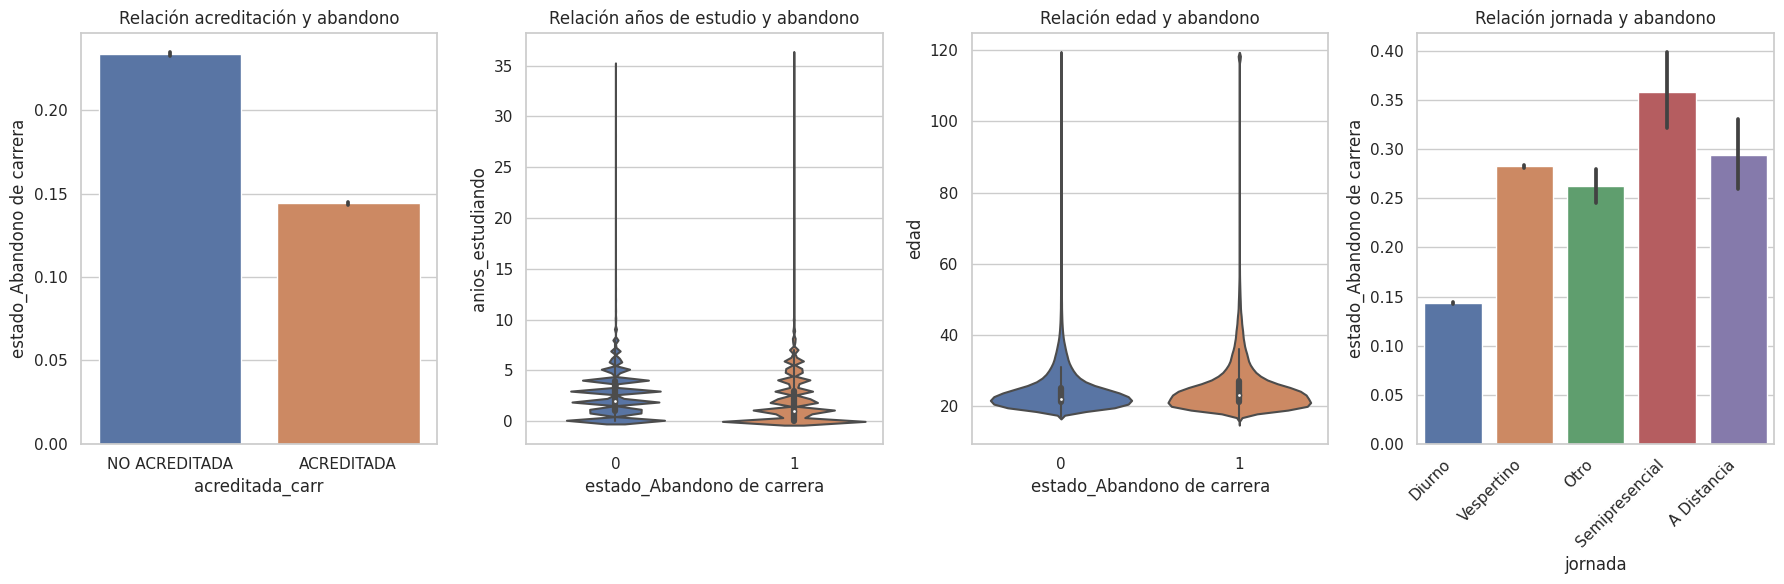

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Gráfico 1
sns.barplot(x='acreditada_carr', y='estado_Abandono de carrera', data=df_combinado, ax=axes[0])
axes[0].set_title("Relación acreditación y abandono")

# Gráfico 2
sns.violinplot(x='estado_Abandono de carrera', y='anios_estudiando', data=df_combinado, ax=axes[1])
axes[1].set_title("Relación años de estudio y abandono")

# Gráfico 3
sns.violinplot(x='estado_Abandono de carrera', y='edad', data=df_combinado, ax=axes[2])
axes[2].set_title("Relación edad y abandono")

# Gráfico 4
barplot = sns.barplot(x='jornada', y='estado_Abandono de carrera', data=df_combinado, ax=axes[3])
axes[3].set_title("Relación jornada y abandono")

# Rotar etiquetas del eje x en el último gráfico
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


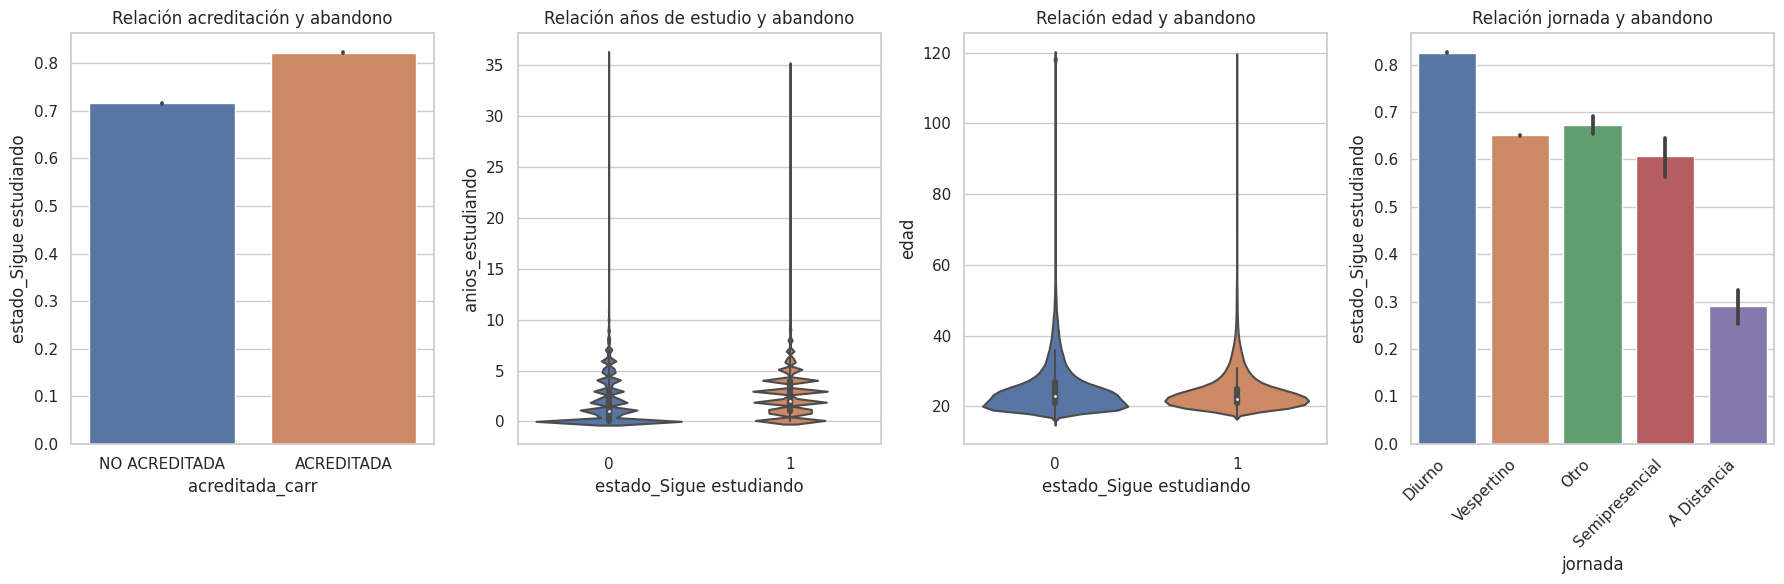

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Gráfico 1
sns.barplot(x='acreditada_carr', y='estado_Sigue estudiando', data=df_combinado, ax=axes[0])
axes[0].set_title("Relación acreditación y abandono")

# Gráfico 2
sns.violinplot(x='estado_Sigue estudiando', y='anios_estudiando', data=df_combinado, ax=axes[1])
axes[1].set_title("Relación años de estudio y abandono")

# Gráfico 3
sns.violinplot(x='estado_Sigue estudiando', y='edad', data=df_combinado, ax=axes[2])
axes[2].set_title("Relación edad y abandono")

# Gráfico 4
barplot = sns.barplot(x='jornada', y='estado_Sigue estudiando', data=df_combinado, ax=axes[3])
axes[3].set_title("Relación jornada y abandono")

# Rotar etiquetas del eje x en el último gráfico
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

# Gráfico 1
sns.barplot(x='acreditada_carr', y='estado_Pausa en los estudios', data=df_combinado, ax=axes[0])
axes[0].set_title("Relación acreditación y abandono")

# Gráfico 2
sns.violinplot(x='estado_Pausa en los estudios', y='anios_estudiando', data=df_combinado, ax=axes[1])
axes[1].set_title("Relación años de estudio y abandono")

# Gráfico 3
sns.violinplot(x='estado_Pausa en los estudios', y='edad', data=df_combinado, ax=axes[2])
axes[2].set_title("Relación edad y abandono")

# Gráfico 4
barplot = sns.barplot(x='jornada', y='estado_Pausa en los estudios', data=df_combinado, ax=axes[3])
axes[3].set_title("Relación jornada y abandono")

# Rotar etiquetas del eje x en el último gráfico
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()


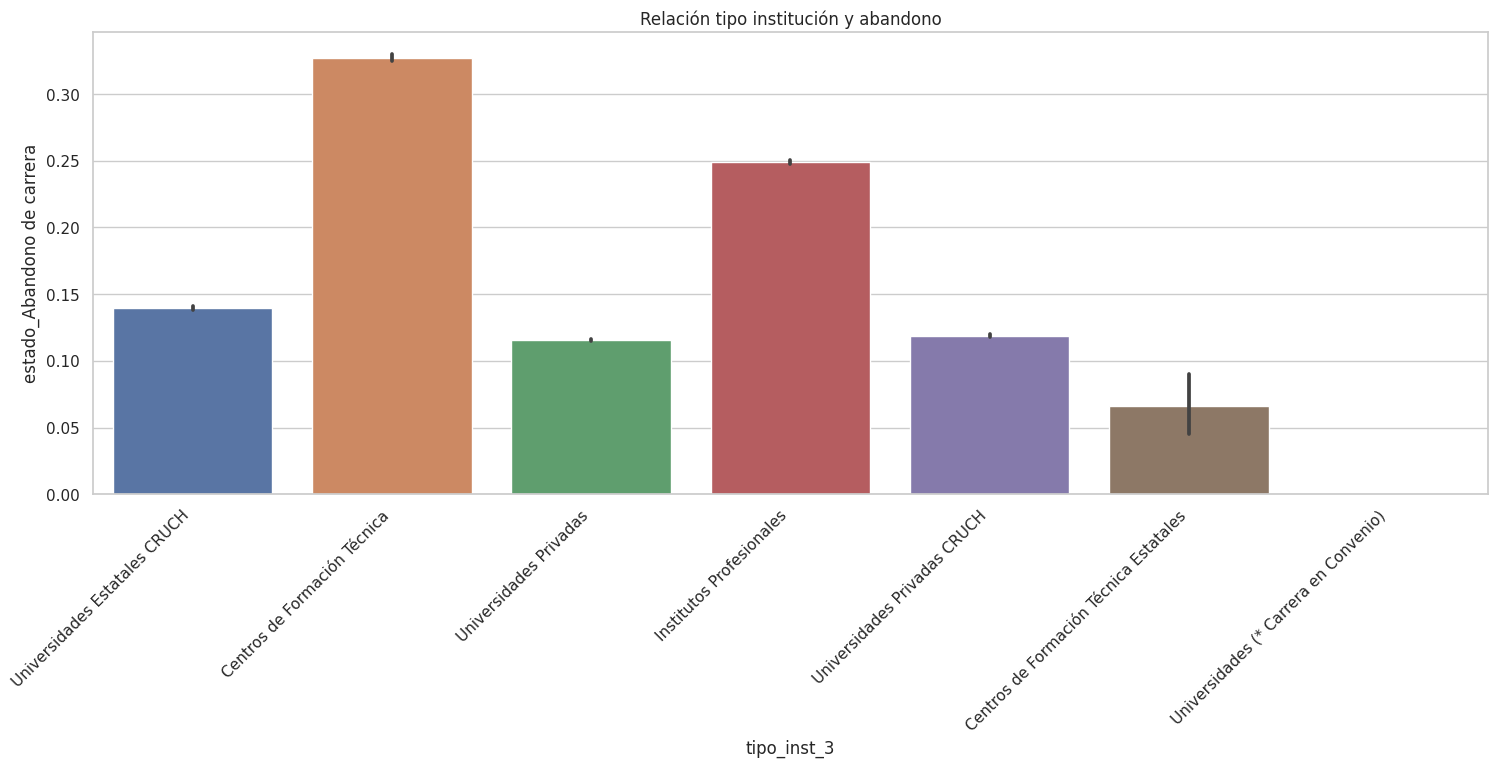

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(x='tipo_inst_3', y='estado_Abandono de carrera', data=df_combinado, ax=axes)
axes.set_title("Relación tipo institución y abandono")

# Inclinar los nombres de las barras en el eje x (horizontal)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


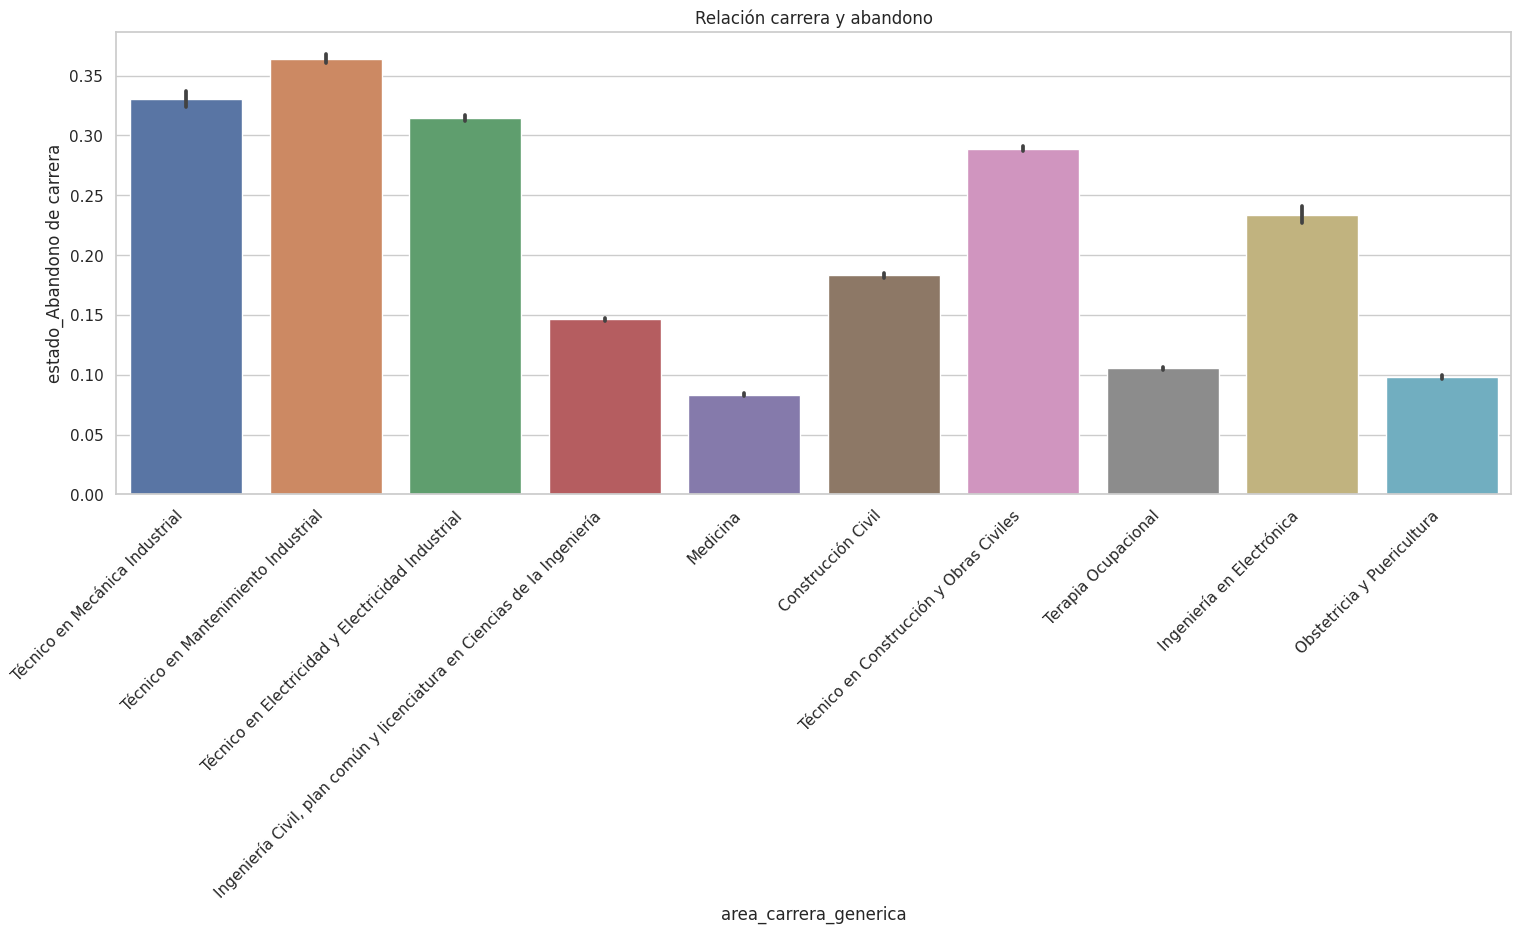

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(x='area_carrera_generica', y='estado_Abandono de carrera', data=df_combinado, ax=axes)
axes.set_title("Relación carrera y abandono")

# Inclinar los nombres de las barras en el eje x (horizontal)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

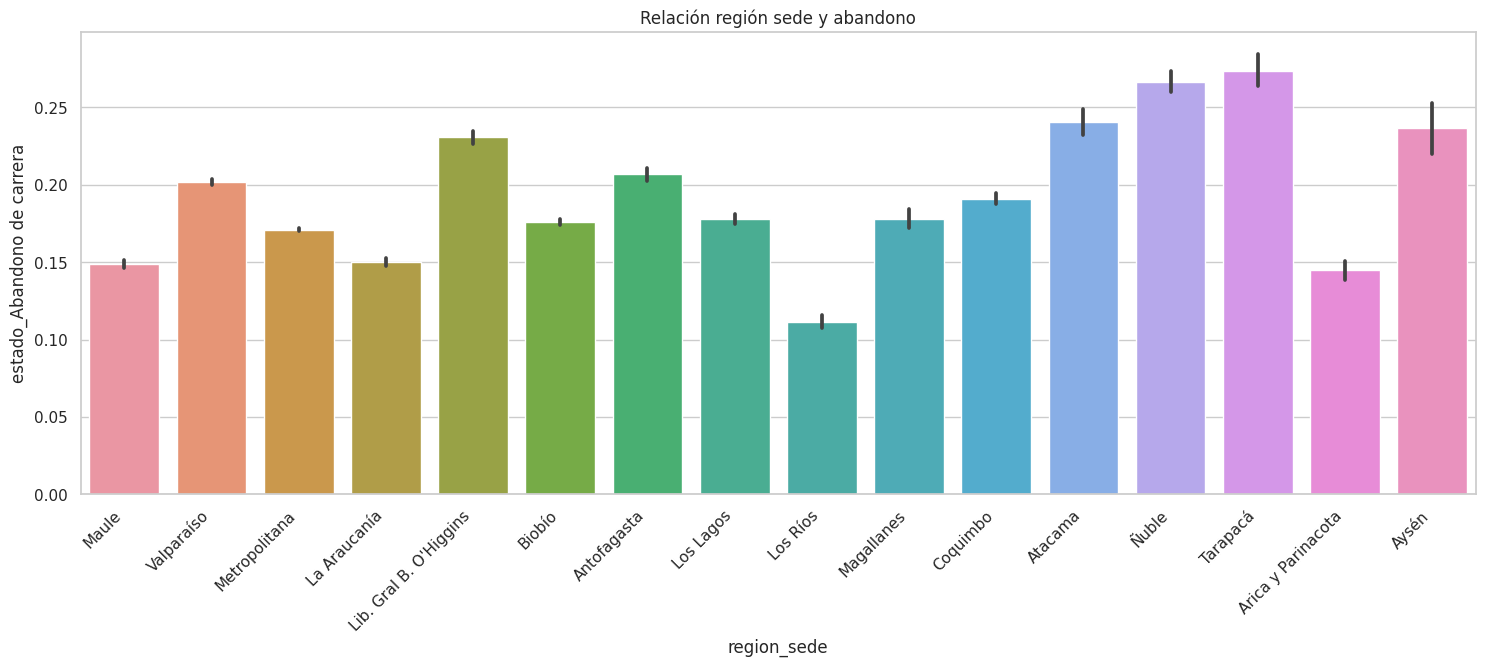

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

sns.barplot(x='region_sede', y='estado_Abandono de carrera', data=df_combinado, ax=axes)
axes.set_title("Relación región sede y abandono")

# Inclinar los nombres de las barras en el eje x (horizontal)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


<ipython-input-60-ddb82fe5f78a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combinado.corr()


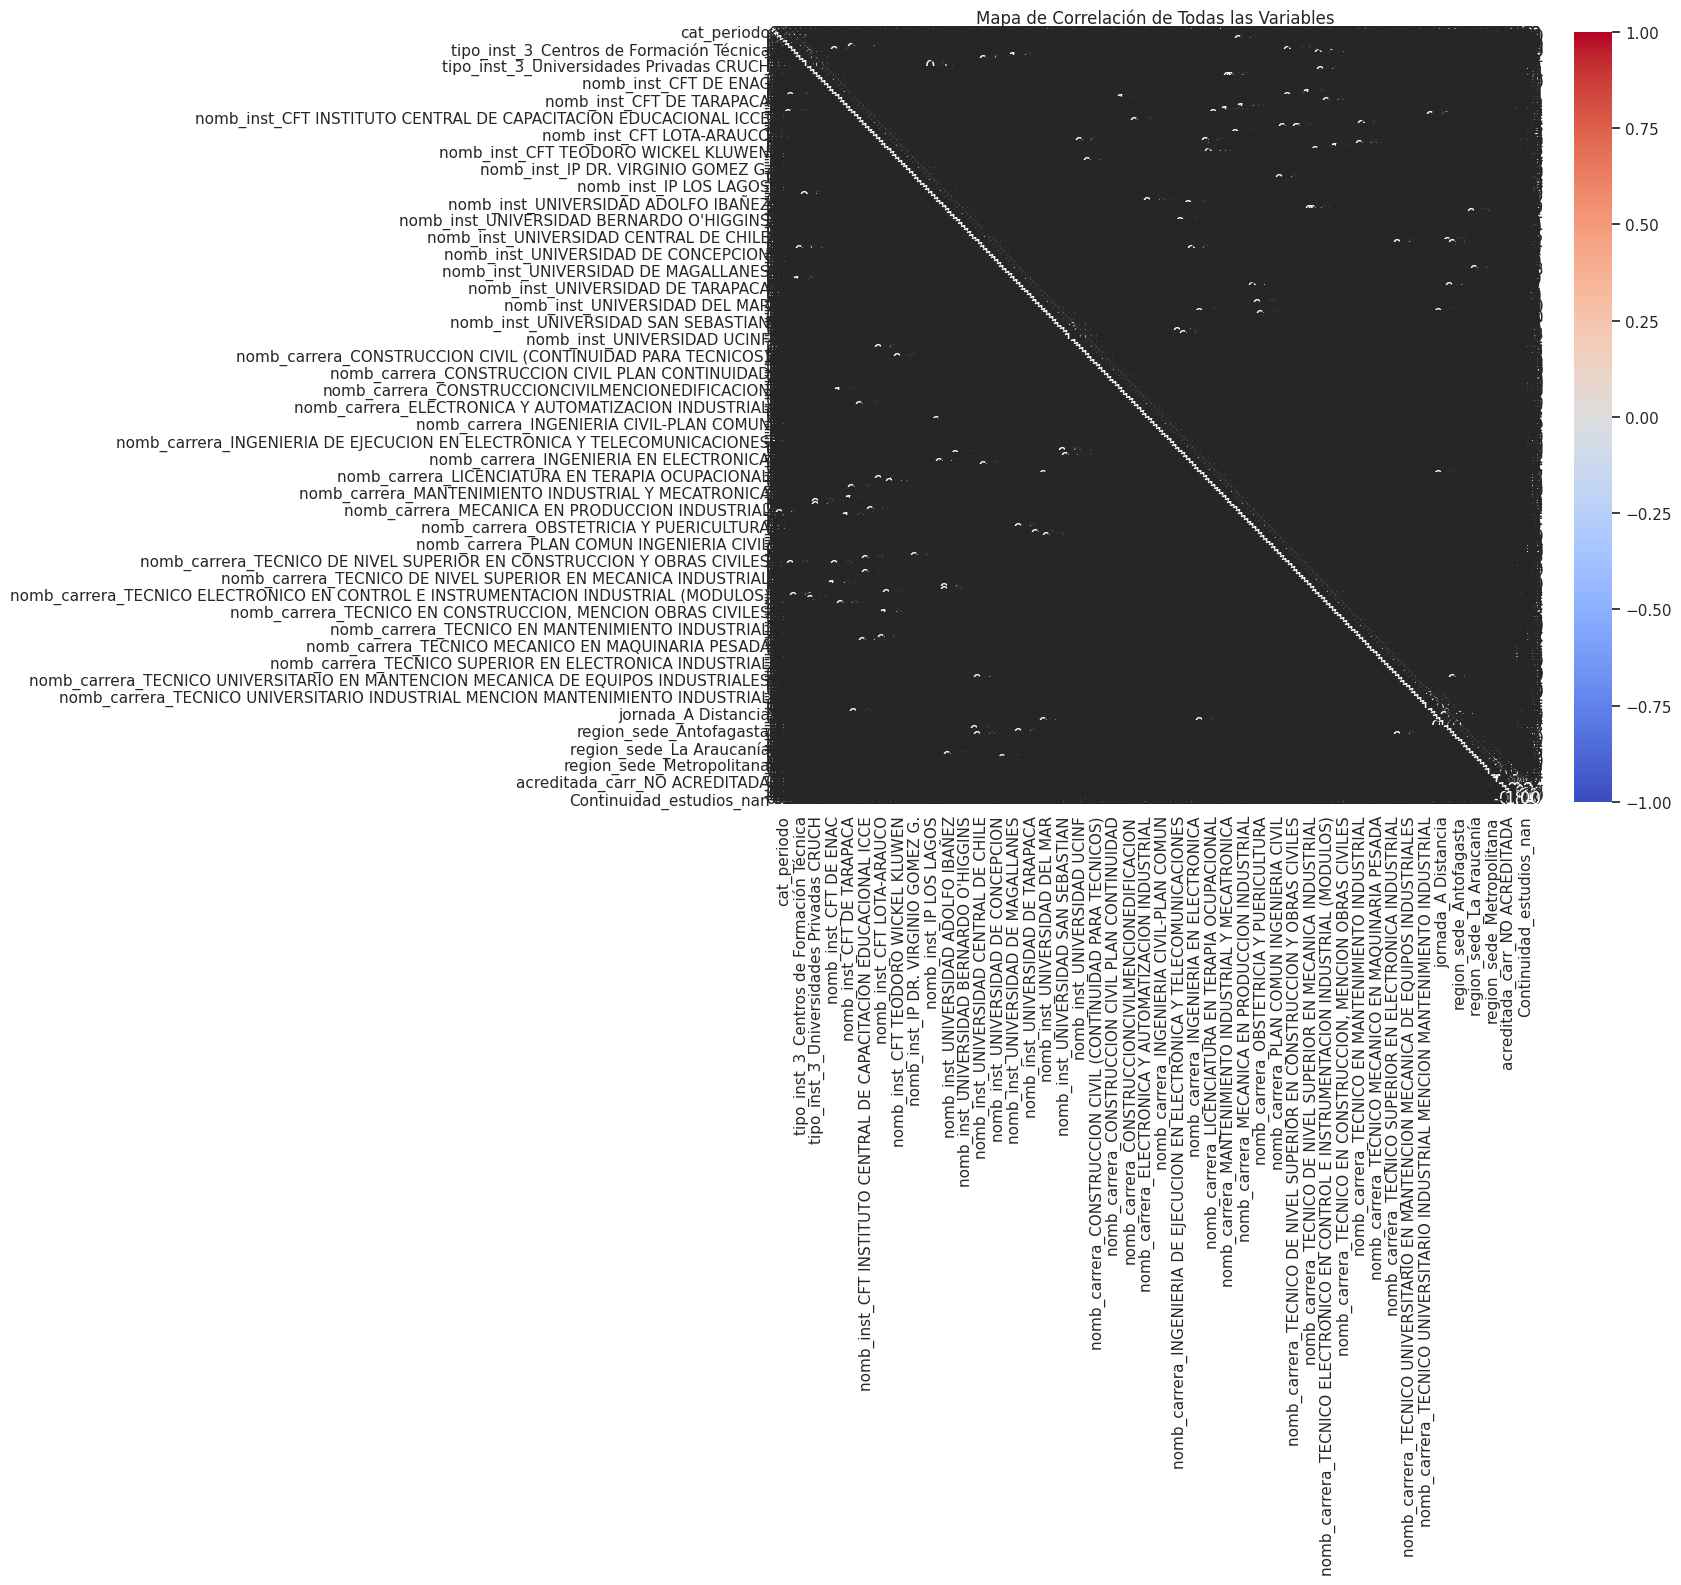

In [ ]:
# Calcula la matriz de correlación para todas las variables
correlation_matrix = df_combinado.corr()

# Crea un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Correlación de Todas las Variables')
plt.show()


In [ ]:
import pandas as pd

# Supongamos que df_combinado es tu DataFrame combinado
# Para ver todas las categorías en cada columna, puedes usar:
for columna in df_combinado.columns:
    if df_combinado[columna].dtype == 'object':
        categorias = df_combinado[columna].value_counts()
        print(f"Categorías en la columna '{columna}':\n{categorias}\n")

Categorías en la columna 'tipo_inst_3':
Universidades Privadas                    342171
Institutos Profesionales                  311876
Universidades Privadas CRUCH              245547
Universidades Estatales CRUCH             221499
Centros de Formación Técnica              143455
Centros de Formación Técnica Estatales       467
Universidades (* Carrera en Convenio)        453
Name: tipo_inst_3, dtype: int64

Categorías en la columna 'nomb_inst':
PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE                                          97032
IP AIEP                                                                           95518
IP DUOC UC                                                                        77110
UNIVERSIDAD DE CHILE                                                              76501
CFT INACAP                                                                        75888
                                                                                  ...  
UNIVERSIDAD LA REP

In [ ]:
# Intento de Regresión Multinomial (porque hay 3 categorias)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las características y la variable objetivo
# Asegúrate de tener las columnas apropiadamente preparadas y limpias antes de aplicar el modelo.

# Ejemplo de preparación de datos
X = df[['edad', 'feature2', 'feature3']]  # Features
y = df['estado_Abandono de carrera']  # Variable objetivo

# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión multinomial
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Imprimir informe de clasificación
print(classification_report(y_test, y_pred))


<ipython-input-15-d38d975ace75>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_combinado.corr()


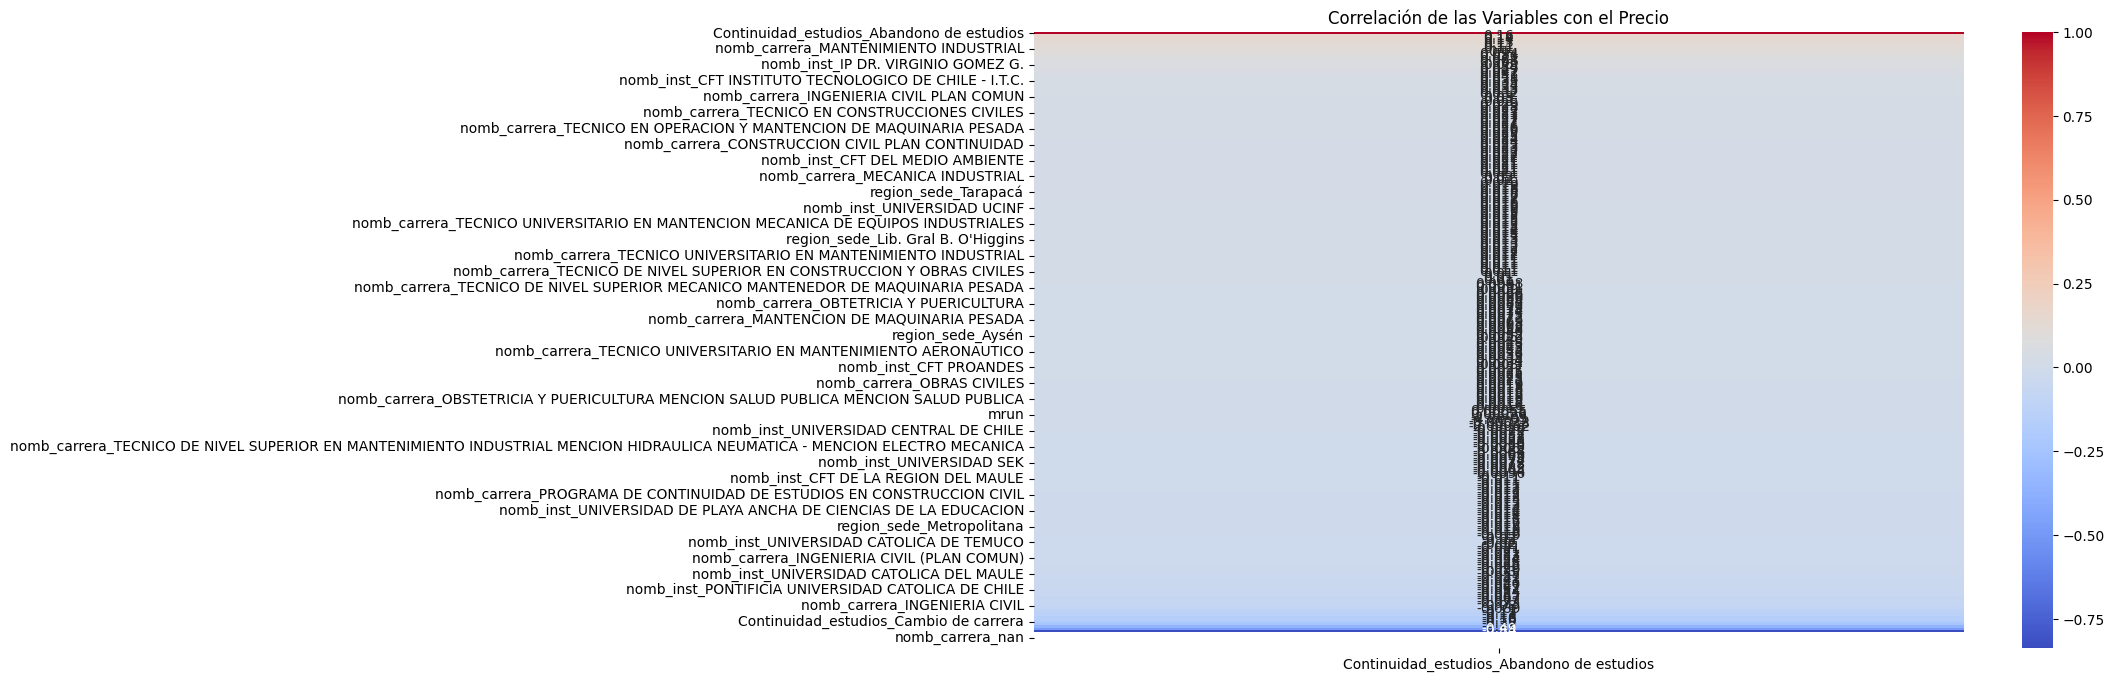

In [ ]:
corr_matrix = df_combinado.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix[['Continuidad_estudios_Abandono de estudios']].sort_values(by='Continuidad_estudios_Abandono de estudios', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de las Variables con el Precio')
plt.show()

<ipython-input-20-ec7f7a349a56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_combinado.corr()


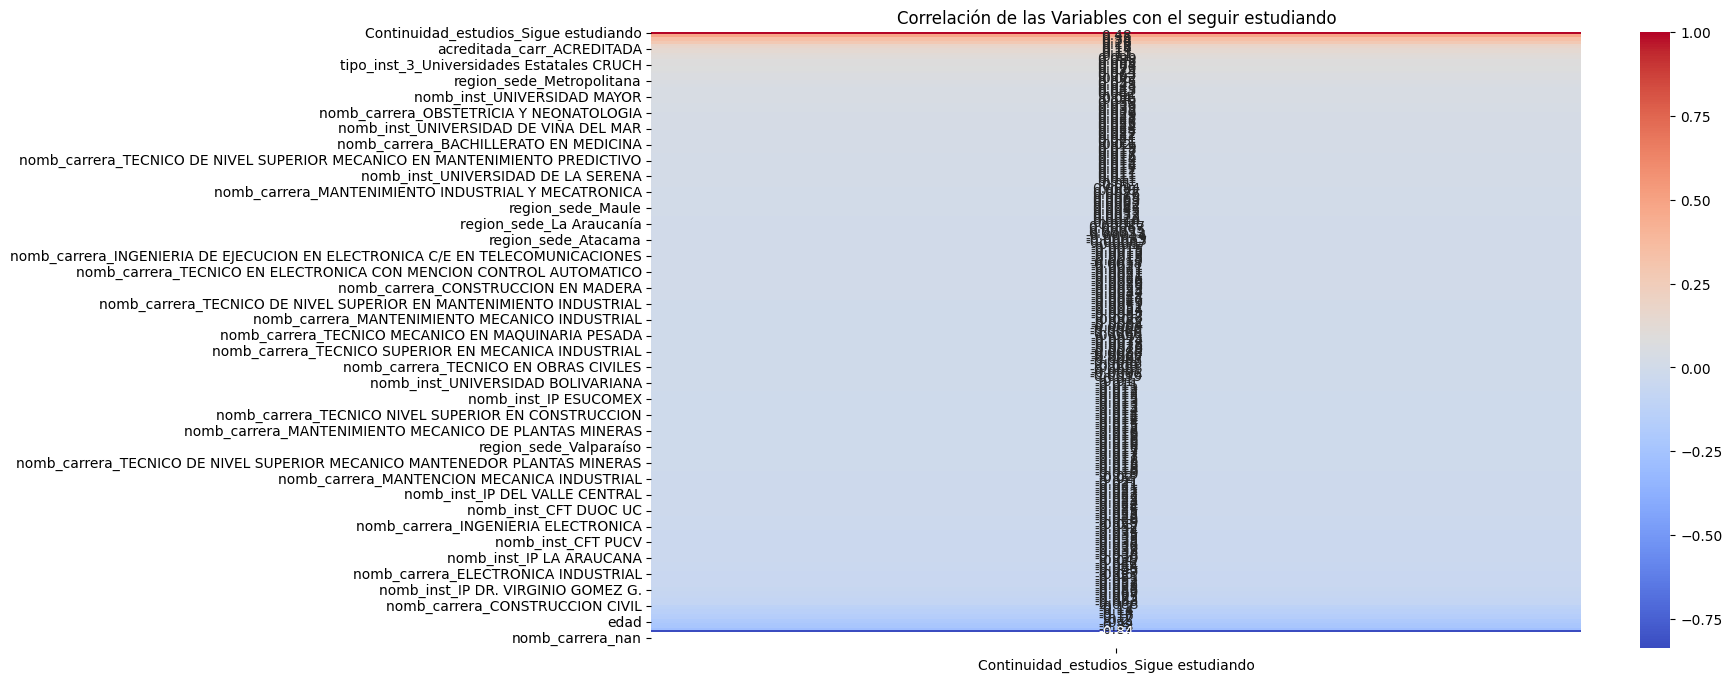

In [ ]:
corr_matrix = df_combinado.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix[['Continuidad_estudios_Sigue estudiando']].sort_values(by='Continuidad_estudios_Sigue estudiando', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación de las Variables con el seguir estudiando')
plt.show()